In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves,compare_historys

--2024-05-24 10:15:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-24 10:15:54 (73.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
unzip_data('nlp_getting_started.zip')

--2024-05-24 10:16:02--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.207, 173.194.194.207, 173.194.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2024-05-24 10:16:02 (39.1 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [3]:
import pandas as pd
train_df= pd.read_csv("train.csv")
test_df =pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [5]:
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [6]:
len(train_df)+len(test_df)

10876

In [7]:
import random
random_index= random.randint(0,len(train_df)-5)
for row in train_df_shuffled[['text','target']].itertuples():
  _,text,target=row
  print(f"Target:{target}" if target>0 else "{not real disaster}")
  print(f"Text:\n{text}\n")
  print("---\n")

Streaming output truncated to the last 5000 lines.
{not real disaster}
Text:
And my mentions are blown up for what? ?? wtf.

---

{not real disaster}
Text:
@Blizzard_Gamin ight

---

{not real disaster}
Text:
@BadAstronomer ...I have a lot of trouble getting both students and adults to understand that the moon is farther away than they think.

---

Target:1
Text:
Russian nuclear-biological-chemical (NBC) brigade 'emergency response' exercise in Southern MD http://t.co/Ul5XdblmBk http://t.co/VjHpVLnbaw

---

{not real disaster}
Text:
I Pledge Allegiance To The P.O.P.E. And The Burning Buildings of Epic City. ??????

---

Target:1
Text:
Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ... http://t.co/mXZ7yX8ld1

---

{not real disaster}
Text:
Hellfire is surrounded by desires so be careful and donÛªt let your desires control you! #Afterlife

---

{not real disaster}
Text:
@ShekharGupta @mihirssharma high time TV channels realised what level

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_df_shuffled["text"].to_numpy()
                                                                        ,train_df_shuffled["target"].to_numpy()
                                                                        ,test_size=0.1
                                                                        ,random_state=42
                                                                       )

In [10]:
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels),

(6851, 6851, 762, 762)

In [11]:
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

train_sentences[:10],train_labels[:10]

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorizer=TextVectorization(max_tokens=None,
                                  standardize="lower_and_strip_punctuation",
                                  split="whitespace",
                                  ngrams=None,
                                  output_mode="int",
                                  output_sequence_length=None,
                                  pad_to_max_tokens=False)

In [13]:
round(sum([len(i.split())for i in train_sentences])/len(train_sentences))

15

In [14]:
max([len(i.split())for i in train_sentences])

31

In [15]:
max_vocab_length=10000
max_length=15

text_vectorizer=TextVectorization(max_tokens=max_vocab_length,
                                  output_mode="int",
                                  output_sequence_length=max_length)

In [16]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [17]:
text_vectorizer.adapt(train_sentences)

In [18]:
sample_sentences="Thre's a flood in my street!"
text_vectorizer([sample_sentences])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  1,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [19]:
import random
random_sentence=random.choice(train_sentences)
print(f"Original Sentence:{random_sentence}\n\nVectorized form: ")
text_vectorizer([random_sentence])

Original Sentence:the apocalypse is upon us

Vectorized form: 


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  2, 409,   9, 977,  69,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [20]:
words_in_vode=text_vectorizer.get_vocabulary()
top10=words_in_vode[:10]
bottom10=words_in_vode[-5:]

In [21]:
print(top10)

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']


In [22]:
print(bottom10)

['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [23]:
from tensorflow.keras import layers
embedding=layers.Embedding(input_dim=max_vocab_length,
                           output_dim=128,
                           embeddings_initializer="uniform",
                           input_length=max_length)
embedding

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0=Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])

model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [25]:
baseline_score=model_0.score(val_sentences,val_labels)
print(f"Accuracy: {baseline_score*100:.2f}%")

Accuracy: 79.27%


In [26]:
baseline_preds=model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [27]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true,y_pred):
  accuracy=accuracy_score(y_true,y_pred)*100
  precision,recall,fscore,_=precision_recall_fscore_support(y_true,y_pred,average="weighted")
  model_results={"accuracy": accuracy,
                 "precision": precision,
                 "recall": recall,
                 "fscore": fscore
                }
  return model_results

In [28]:
baseline_results=calculate_results(y_true=val_labels,y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'fscore': 0.7862189758049549}

In [29]:
from helper_functions import create_tensorboard_callback
SAVE_DIR="model_logs"

In [30]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_1=tf.keras.Model(inputs,outputs,name="model_1_dense")

In [31]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [32]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [33]:
model_1_history=model_1.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                    experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20240524-101617
Epoch 1/5
215/215 [==============================] - 27s 95ms/step - loss: 0.6100 - accuracy: 0.6939 - val_loss: 0.5348 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4400 - accuracy: 0.8206 - val_loss: 0.4677 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3455 - accuracy: 0.8619 - val_loss: 0.4602 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2826 - accuracy: 0.8917 - val_loss: 0.4675 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2363 - accuracy: 0.9133 - val_loss: 0.4796 - val_accuracy: 0.7769


In [34]:
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7769


[0.4795605540275574, 0.7769029140472412]

In [35]:
model_1_pred_probs =model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.3673201 ],
       [0.7756927 ],
       [0.9976478 ],
       [0.13596359],
       [0.14545396],
       [0.9397618 ],
       [0.8891573 ],
       [0.9933995 ],
       [0.9635322 ],
       [0.31653064]], dtype=float32)

In [36]:
model_1_pred_probs.shape

(762, 1)

In [37]:
model_1_pred_probs=tf.squeeze(tf.round(model_1_pred_probs))
model_1_pred_probs[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [38]:
model_1_results=calculate_results(y_true=val_labels,y_pred=model_1_pred_probs)
model_1_results

{'accuracy': 77.69028871391076,
 'precision': 0.7798819103655997,
 'recall': 0.7769028871391076,
 'fscore': 0.7743498017353971}

In [39]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'fscore': 0.7862189758049549}

In [40]:
import numpy as np
np.array(list(model_1_results.values()))>np.array(list(baseline_results.values()))

array([False, False, False, False])

In [41]:
words_in_vocab=text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [42]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [43]:
embed_weigths=model_1.get_layer("embedding").get_weights()[0]
print(embed_weigths.shape)

(10000, 128)


In [44]:
embed_weigths

array([[-0.01230317, -0.06498308,  0.02811348, ...,  0.02738274,
         0.02677478,  0.04536417],
       [-0.01142845, -0.02854959, -0.01502873, ..., -0.0324418 ,
        -0.04622808, -0.00672974],
       [-0.0102321 , -0.04775181,  0.01205835, ..., -0.03665021,
        -0.04953192,  0.05362102],
       ...,
       [ 0.04011789, -0.02695451,  0.03008137, ..., -0.04688844,
         0.03998927, -0.03388901],
       [ 0.01610655, -0.04863035, -0.06082902, ..., -0.07232121,
         0.00712522,  0.05258962],
       [ 0.0802899 , -0.01785727, -0.07944741, ..., -0.10011533,
        -0.0224203 ,  0.09895068]], dtype=float32)

In [45]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weigths[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [46]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [48]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
# x=layers.LSTM(64,return_sequences=True)(x)
x=layers.LSTM(64)(x)
# x=layers.Dense(64,activation="relu")(x)
outputs=layers.Dense(1,activation="sigmoid")(x)

model_2=tf.keras.Model(inputs,outputs,name="model_2_LSTM")

In [49]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [50]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [51]:
model_2_history=model_2.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20240524-101707
Epoch 1/5
215/215 [==============================] - 12s 39ms/step - loss: 0.2216 - accuracy: 0.9240 - val_loss: 0.5528 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1555 - accuracy: 0.9422 - val_loss: 0.6372 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1280 - accuracy: 0.9515 - val_loss: 0.6734 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1055 - accuracy: 0.9596 - val_loss: 0.9150 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0826 - accuracy: 0.9689 - val_loss: 1.0038 - val_accuracy: 0.7835


In [52]:
model_2_preds_probs=model_2.predict(val_sentences)
model_2_preds_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[3.1630844e-02],
       [9.5125240e-01],
       [9.9977475e-01],
       [5.1652998e-02],
       [6.4476865e-04],
       [9.9931180e-01],
       [9.6171731e-01],
       [9.9985433e-01],
       [9.9977463e-01],
       [6.4744711e-01]], dtype=float32)

In [53]:
model_2_preds=tf.squeeze(tf.round(model_2_preds_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [54]:
model_2_results=calculate_results(y_pred=model_2_preds,y_true=val_labels)

In [55]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'fscore': 0.7862189758049549}

In [56]:
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GRU(64)(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_3=tf.keras.Model(inputs,outputs,name="model_3_GRU")

In [57]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [58]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

In [59]:
model_3_history=model_3.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20240524-101729
Epoch 1/5
215/215 [==============================] - 12s 46ms/step - loss: 0.1559 - accuracy: 0.9383 - val_loss: 0.7368 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0862 - accuracy: 0.9692 - val_loss: 0.8505 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0720 - accuracy: 0.9731 - val_loss: 0.8643 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0612 - accuracy: 0.9750 - val_loss: 1.0222 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0519 - accuracy: 0.9791 - val_loss: 1.1453 - val_accuracy: 0.7730


In [60]:
model_3_preds_probs=model_3.predict(val_sentences)
model_3_preds=tf.squeeze(tf.round(model_3_preds_probs))
model_3_preds[:10]

24/24 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [61]:
model_3_results=calculate_results(y_pred=model_3_preds,y_true=val_labels)
model_3_results

{'accuracy': 77.29658792650919,
 'precision': 0.7766832892495897,
 'recall': 0.7729658792650919,
 'fscore': 0.7700024804405922}

In [62]:
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Bidirectional(layers.LSTM(64))(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_4=tf.keras.Model(inputs,outputs,name="model_4_bidirectional")

In [63]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [64]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [65]:
model_4_history=model_4.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_4_Bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_Bidirectional/20240524-101752
Epoch 1/5
215/215 [==============================] - 14s 46ms/step - loss: 0.1067 - accuracy: 0.9724 - val_loss: 0.9577 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0552 - accuracy: 0.9765 - val_loss: 1.2893 - val_accuracy: 0.7546
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0479 - accuracy: 0.9784 - val_loss: 1.2729 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0407 - accuracy: 0.9801 - val_loss: 1.5460 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0414 - accuracy: 0.9806 - val_loss: 1.3982 - val_accuracy: 0.7598


In [66]:
model_4_pred_probs=model_4.predict(val_sentences)
model_4_pred=tf.squeeze(tf.round(model_4_pred_probs))

24/24 [==============================] - 1s 6ms/step


In [67]:
model_4_results=calculate_results(y_pred=model_4_pred,y_true=val_labels)
model_4_results

{'accuracy': 75.98425196850394,
 'precision': 0.7599947657549518,
 'recall': 0.7598425196850394,
 'fscore': 0.7584680708642795}

In [68]:
model_3_results

{'accuracy': 77.29658792650919,
 'precision': 0.7766832892495897,
 'recall': 0.7729658792650919,
 'fscore': 0.7700024804405922}

In [69]:
inputs="This is disastorous !!"
x=text_vectorizer([inputs])
embeddings=embedding(x)
print(embeddings.shape)
conv_1d=layers.Conv1D(filters=32,
                kernel_size=5,
                strides=1,
                activation="relu",
                padding="same")(embeddings)
print(conv_1d.shape)
maxpool=layers.GlobalMaxPool1D()(conv_1d)
print(maxpool.shape)

(1, 15, 128)
(1, 15, 32)
(1, 32)


In [70]:
embeddings

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.020309  ,  0.01234568, -0.06415337, ..., -0.03295289,
          0.04075084,  0.05847274],
        [ 0.00669583, -0.04769584,  0.02055622, ...,  0.01312677,
         -0.0351105 ,  0.02593942],
        [-0.02435333, -0.01109474, -0.01800407, ..., -0.01923766,
         -0.07608716, -0.02347387],
        ...,
        [-0.01039148, -0.02093165, -0.0044794 , ...,  0.02892237,
          0.0069881 ,  0.00554561],
        [-0.01039148, -0.02093165, -0.0044794 , ...,  0.02892237,
          0.0069881 ,  0.00554561],
        [-0.01039148, -0.02093165, -0.0044794 , ...,  0.02892237,
          0.0069881 ,  0.00554561]]], dtype=float32)>

In [71]:
conv_1d

<tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
array([[[0.01733585, 0.        , 0.        , 0.00097298, 0.        ,
         0.        , 0.        , 0.0099961 , 0.00931483, 0.        ,
         0.        , 0.01699086, 0.02543022, 0.07134943, 0.        ,
         0.        , 0.        , 0.03732681, 0.        , 0.03516464,
         0.01381605, 0.03512694, 0.01464699, 0.        , 0.0499819 ,
         0.06314021, 0.        , 0.04119487, 0.02681103, 0.        ,
         0.        , 0.00766554],
        [0.01885375, 0.0004142 , 0.        , 0.        , 0.05433419,
         0.        , 0.01917351, 0.0248077 , 0.        , 0.02900187,
         0.        , 0.        , 0.        , 0.04219367, 0.        ,
         0.03513467, 0.00903462, 0.04550079, 0.0195813 , 0.        ,
         0.        , 0.02330683, 0.        , 0.        , 0.00260837,
         0.06859631, 0.01179424, 0.02924119, 0.        , 0.        ,
         0.        , 0.        ],
        [0.02099306, 0.        , 0.        , 0.0134

In [72]:
maxpool

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.02099306, 0.0004142 , 0.03288271, 0.01682341, 0.05433419,
        0.02099776, 0.01917351, 0.0248077 , 0.04299368, 0.05730677,
        0.05880849, 0.09044721, 0.02543022, 0.07134943, 0.02078334,
        0.03513467, 0.01370073, 0.04550079, 0.04904275, 0.0370549 ,
        0.01381605, 0.03512694, 0.01464699, 0.01289055, 0.05086973,
        0.06859631, 0.02356843, 0.0499391 , 0.04010981, 0.        ,
        0.        , 0.00766554]], dtype=float32)>

In [73]:
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Conv1D(filters=64,
                kernel_size=5,
                activation="relu",
                padding="valid"
                )(x)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_5=tf.keras.Model(inputs,outputs,name="model_5_conv1d")

In [74]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [75]:
model_5.summary()

Model: "model_5_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 1)              

In [76]:
model_5_history=model_5.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_5_conv1d")])

Saving TensorBoard log files to: model_logs/model_5_conv1d/20240524-101839
Epoch 1/5
215/215 [==============================] - 11s 38ms/step - loss: 0.1224 - accuracy: 0.9606 - val_loss: 0.9396 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0731 - accuracy: 0.9727 - val_loss: 1.0792 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0611 - accuracy: 0.9747 - val_loss: 1.1965 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0546 - accuracy: 0.9785 - val_loss: 1.1993 - val_accuracy: 0.7546
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0516 - accuracy: 0.9778 - val_loss: 1.2672 - val_accuracy: 0.7598


In [77]:
model_5_pred_probs=model_5.predict(val_sentences)
model_5_pred=tf.squeeze(tf.round(model_5_pred_probs))
model_5_pred[:10]

24/24 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [78]:
model_5_results=calculate_results(y_pred=model_5_pred,
                                   y_true=val_labels)
model_5_results

{'accuracy': 75.98425196850394,
 'precision': 0.7601337255372377,
 'recall': 0.7598425196850394,
 'fscore': 0.7583542786286791}

In [79]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'fscore': 0.7862189758049549}

In [80]:
import tensorflow_hub as hub

embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2")
embed_samples=embed([sample_sentences,"When you can the universal enetenc encoder"])
print(embed_samples[0][:50])

tf.Tensor(
[ 0.0257126   0.00897088  0.03263103 -0.02335485  0.0446016   0.09460072
  0.03976465  0.03140296  0.01314197  0.04305947  0.00040754  0.02078035
 -0.0368832  -0.00559096  0.08270589 -0.05654171  0.01761474 -0.03852423
  0.03575286 -0.05301024 -0.03825977 -0.00892859  0.00156424  0.00310351
  0.00458895 -0.01748913  0.02606546 -0.03063093 -0.03118715  0.01069033
 -0.05582469  0.05702089 -0.04461644 -0.0285789   0.02502176 -0.07887822
  0.02351001  0.02919388 -0.03414472 -0.08363401  0.0465483  -0.04148537
 -0.00973585 -0.02631906 -0.10335648 -0.05728225 -0.00520909 -0.01654627
 -0.0445292   0.03338879], shape=(50,), dtype=float32)


In [81]:
embed_samples[0].shape

TensorShape([512])

In [82]:
sentence_encoder_layer=hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2",
                                      input_shape=[],
                                      dtype=tf.string,
                                      trainable=False,
                                      name="model_6_USE"
                                      )

In [83]:
model_6=tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(1,activation="sigmoid")
],name="model_6_USE")

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [84]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_6_USE (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 256798337 (979.61 MB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [85]:
model_6_history=model_6.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"tf_hub_USE")])

Saving TensorBoard log files to: model_logs/tf_hub_USE/20240524-101929
Epoch 1/5
215/215 [==============================] - 7s 15ms/step - loss: 0.6485 - accuracy: 0.7275 - val_loss: 0.6120 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.5818 - accuracy: 0.7846 - val_loss: 0.5632 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.5392 - accuracy: 0.7923 - val_loss: 0.5317 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.5105 - accuracy: 0.7949 - val_loss: 0.5107 - val_accuracy: 0.7953
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4904 - accuracy: 0.7968 - val_loss: 0.4965 - val_accuracy: 0.7940


In [86]:
model_6_pred_probs=model_6.predict(val_sentences)
model_6_pred=tf.squeeze(tf.round(model_6_pred_probs))
model_6_pred[:10]

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [87]:
model_6_results=calculate_results(y_pred=model_6_pred,
                                  y_true=val_labels)
model_6_results

{'accuracy': 79.39632545931758,
 'precision': 0.7948322965247082,
 'recall': 0.7939632545931758,
 'fscore': 0.7926864576213257}

In [88]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'fscore': 0.7862189758049549}

In [89]:
model_6=tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
],name="model_6_USE")

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [90]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_6_USE (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [91]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [92]:
model_6_history=model_6.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"tf_hub_USE")])

Saving TensorBoard log files to: model_logs/tf_hub_USE/20240524-101954
Epoch 1/5
215/215 [==============================] - 6s 19ms/step - loss: 0.5061 - accuracy: 0.7835 - val_loss: 0.4502 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4145 - accuracy: 0.8151 - val_loss: 0.4401 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4009 - accuracy: 0.8229 - val_loss: 0.4341 - val_accuracy: 0.8071
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3932 - accuracy: 0.8262 - val_loss: 0.4300 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3866 - accuracy: 0.8286 - val_loss: 0.4283 - val_accuracy: 0.8123


In [93]:
model_6_pred_probs=model_6.predict(val_sentences)
model_6_pred=tf.squeeze(tf.round(model_6_pred_probs))
model_6_pred[:10]

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [94]:
model_6_results=calculate_results(y_pred=model_6_pred,
                                  y_true=val_labels)
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.8152105639975652,
 'recall': 0.8123359580052494,
 'fscore': 0.8105808468856647}

In [95]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'fscore': 0.7862189758049549}

In [96]:
train_df_shuffled[:10]

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
5559,7934,rainstorm,NaN,@Calum5SOS you look like you got caught in a r...,0
1765,2538,collision,NaN,my favorite lady came to our volunteer meeting...,1
1817,2611,crashed,NaN,@brianroemmele UX fail of EMV - people want to...,1
6810,9756,tragedy,"Los Angeles, CA",Can't find my ariana grande shirt this is a f...,0
4398,6254,hijacking,"Athens,Greece",The Murderous Story Of AmericaÛªs First Hijac...,1


In [97]:
train_sentences_10_precent_split=int(0.1*len(train_sentences))
train_sentences_10_precent=train_sentences[:train_sentences_10_precent_split]
train_labels_10_precent=train_labels[:train_sentences_10_precent_split]

In [98]:
pd.Series(np.array(train_labels_10_precent)).value_counts()

0    406
1    279
Name: count, dtype: int64

In [99]:
train_df_shuffled[["target"]].value_counts()

target
0         4342
1         3271
Name: count, dtype: int64

In [100]:
train_df_shuffled[["target"]].value_counts()

target
0         4342
1         3271
Name: count, dtype: int64

In [101]:
model_7=tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
],name="model_7_USE_correct_split")
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [102]:
model_7.summary()

Model: "model_7_USE_correct_split"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_6_USE (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [103]:
model_7_history=model_7.fit(train_sentences_10_precent,
                            train_labels_10_precent,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_7_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/model_7_10_percent_correct_split/20240524-102014
Epoch 1/5
22/22 [==============================] - 3s 50ms/step - loss: 0.6736 - accuracy: 0.6978 - val_loss: 0.6488 - val_accuracy: 0.7507
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.6002 - accuracy: 0.8117 - val_loss: 0.5896 - val_accuracy: 0.7690
Epoch 3/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5197 - accuracy: 0.8263 - val_loss: 0.5310 - val_accuracy: 0.7677
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4560 - accuracy: 0.8263 - val_loss: 0.5022 - val_accuracy: 0.7717
Epoch 5/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4165 - accuracy: 0.8350 - val_loss: 0.4905 - val_accuracy: 0.7782


In [104]:
model_7_pred_probs=model_7.predict(val_sentences)
model_7_pred=tf.squeeze(tf.round(model_7_pred_probs))
model_7_pred[:10]

24/24 [==============================] - 1s 9ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [105]:
model_7_results=calculate_results(y_pred=model_7_pred,
                  y_true=val_labels)
model_7_results

{'accuracy': 77.82152230971128,
 'precision': 0.7807522349051432,
 'recall': 0.7782152230971129,
 'fscore': 0.7758810170952618}

In [106]:
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.8152105639975652,
 'recall': 0.8123359580052494,
 'fscore': 0.8105808468856647}

In [107]:
all_model_results=pd.DataFrame({"baseline":baseline_results,
                               "1_simple_dense":model_1_results,
                               "2_lstm":model_2_results,
                               "3_gru":model_3_results,
                               "4_bidirectional":model_4_results,
                               "5_conv1D":model_5_results,
                               "6_tf_hub_use_encoder":model_6_results,
                               "7_tf_hub_use_encoder_10_percent":model_7_results
                               })
all_model_results=all_model_results.transpose()

In [108]:
all_model_results["accuracy"]=all_model_results['accuracy']/100

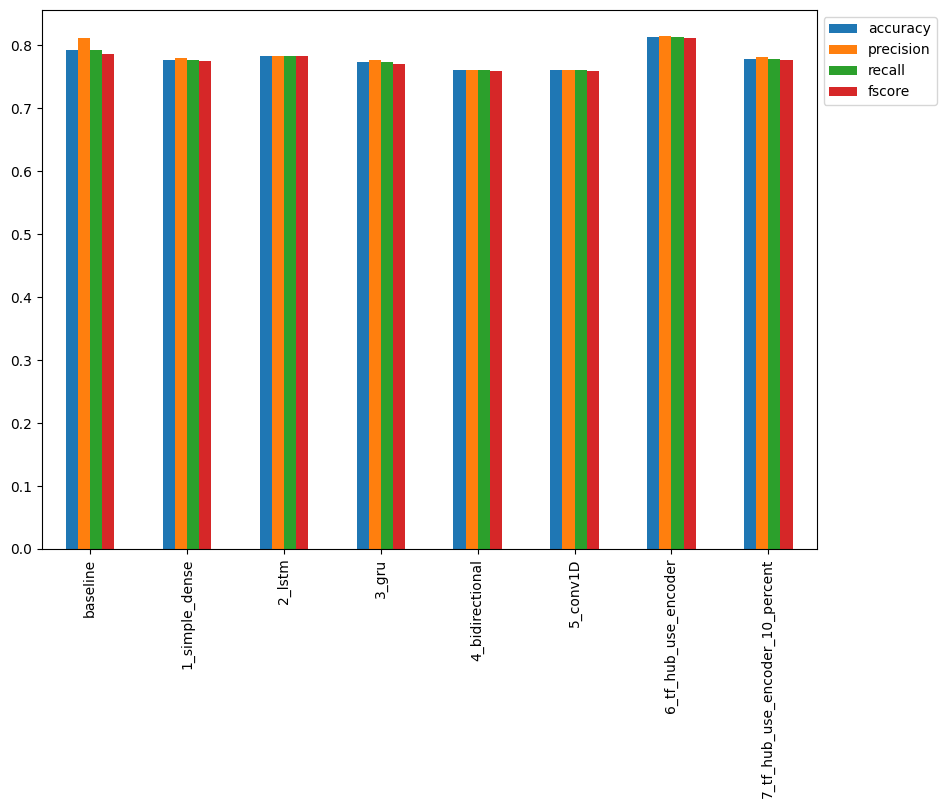

In [109]:
all_model_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

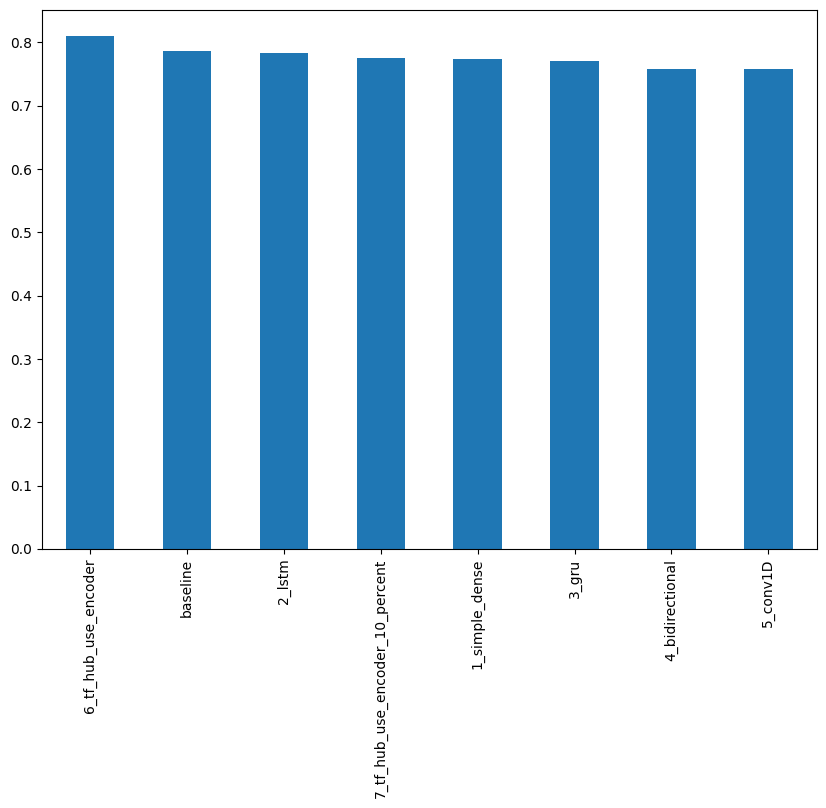

In [110]:
all_model_results.sort_values("fscore", ascending=False)["fscore"].plot(kind="bar", figsize=(10, 7));

In [111]:
!tensorboard dev upload --logdir ./model_logs/  \
  --name "NLP Modelling" \
  --description "comparing models" \
  --one_shot

2024-05-24 10:20:24.190379: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 10:20:24.190436: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 10:20:24.192112: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-24 10:20:25.744910: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
****************************************************************
****************************************************************
****************************************************************

Uploading TensorBoard logs to https://tensorb

In [112]:
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [113]:
loaded_model_6=tf.keras.models.load_model("model_6.h5",
                                   custom_objects={"KerasLayer":hub.KerasLayer})

In [114]:
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4283 - accuracy: 0.8123


[0.42829573154449463, 0.8123359680175781]

In [115]:
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.8152105639975652,
 'recall': 0.8123359580052494,
 'fscore': 0.8105808468856647}

In [116]:
model_6.save("model_6_saved_model_format")

In [117]:
loaded_model_6_saved_model_format=tf.keras.models.load_model("model_6_saved_model_format")

In [118]:
loaded_model_6_saved_model_format.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 21ms/step - loss: 0.4283 - accuracy: 0.8123


[0.42829573154449463, 0.8123359680175781]

In [119]:
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2024-05-24 10:21:19--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.183.207, 142.251.180.207, 142.251.172.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.183.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  50.9MB/s    in 14s     

2024-05-24 10:21:34 (64.4 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variabl

In [120]:
model_6_pretrained=tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [121]:
model_6_pretrained_pred_probs=model_6_pretrained.predict(val_sentences)
model_6_pretrained_pred=tf.squeeze(tf.round(model_6_pretrained_pred_probs))

24/24 [==============================] - 1s 10ms/step


In [122]:
model_6_pretrained_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [123]:
val_df=pd.DataFrame({"text":val_sentences,
                    "target":val_labels,
                   "pred":model_6_pretrained_pred,
                   "pred_prob":tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [124]:
most_wrong=val_df[val_df["target"]!=val_df["pred"]].sort_values("pred_prob",ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [125]:
for row in most_wrong[-10:].itertuples():
  _,text,target,pred,pred_prob=row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: 1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

-----

Target: 1, Pred: 0.0, Prob: 0.05507583171129227
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

-----

Target: 1, Pred: 0.0, Prob: 0.05460337549448013
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

-----

Target: 1, Pred: 0.0, Prob: 0.05459701269865036
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

-----

Target: 1, Pred: 0.0, Prob: 0.049637261778116226
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

-----

Target: 1, Pred: 0.0, Prob: 0.04391848295927048
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

-----

Target: 1, Pred: 0.0, Pro

In [126]:
for row in most_wrong[:10].itertuples():
  _,text,target,pred,pred_prob=row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

-----

Target: 0, Pred: 1.0, Prob: 0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

-----

Target: 0, Pred: 1.0, Prob: 0.8523001074790955
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

-----

Target: 0, Pred: 1.0, Prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

-----

Target: 0, Pred: 1.0, Prob: 0.8272132873535156
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

-----

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!


In [127]:
test_sentences=test_df["text"].to_list()
test_samples=random.sample(test_sentences,10)
test_samples
for test_sample in test_samples:
  pred_prob=tf.squeeze(model_6_pretrained.predict([test_sample]))
  print(pred_prob)
  pred=tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")

1/1 [==============================] - 0s 56ms/step
tf.Tensor(0.9765178, shape=(), dtype=float32)
Pred: 1, Prob: 0.9765177965164185
1/1 [==============================] - 0s 43ms/step
tf.Tensor(0.9335066, shape=(), dtype=float32)
Pred: 1, Prob: 0.9335066080093384
1/1 [==============================] - 0s 38ms/step
tf.Tensor(0.115720645, shape=(), dtype=float32)
Pred: 0, Prob: 0.11572064459323883
1/1 [==============================] - 0s 43ms/step
tf.Tensor(0.2922551, shape=(), dtype=float32)
Pred: 0, Prob: 0.29225510358810425
1/1 [==============================] - 0s 38ms/step
tf.Tensor(0.49811503, shape=(), dtype=float32)
Pred: 0, Prob: 0.49811503291130066
1/1 [==============================] - 0s 39ms/step
tf.Tensor(0.050631378, shape=(), dtype=float32)
Pred: 0, Prob: 0.05063137784600258
1/1 [==============================] - 0s 47ms/step
tf.Tensor(0.056562245, shape=(), dtype=float32)
Pred: 0, Prob: 0.05656224489212036
1/1 [==============================] - 0s 39ms/step
tf.Tensor(0.

In [128]:
test_sentences=test_df["text"].to_list()
test_samples=random.sample(test_sentences,10)
for test_sample in test_samples:
  pred_prob=tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred=tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("-----\n")

1/1 [==============================] - 0s 41ms/step
Pred: 1, Prob: 0.5476059913635254
Text:
U.S National Park Services Tonto National Forest: Stop the Annihilation of the Salt River Wild Horse... https://t.co/i0z3k0chgg via @Change

-----

1/1 [==============================] - 0s 37ms/step
Pred: 0, Prob: 0.15807707607746124
Text:
Uribe just crushed that

-----

1/1 [==============================] - 0s 39ms/step
Pred: 0, Prob: 0.05106590315699577
Text:
lil more i did want a stretcher yc

-----

1/1 [==============================] - 0s 39ms/step
Pred: 1, Prob: 0.627678394317627
Text:
@foxandfriends where is protest looting and rioting that is for ignorant people

-----

1/1 [==============================] - 0s 44ms/step
Pred: 0, Prob: 0.10107646882534027
Text:
I'm having a meltdown because of Game of Thrones ?? literally cried screamed and threw my computer #WHYYYY #redwedding

-----

1/1 [==============================] - 0s 42ms/step
Pred: 1, Prob: 0.9093081951141357
Text:
@PMBreed

In [129]:
tweet="Money can't buy happiness.Just like an H100.H100 = happiness."
pred_prob=tf.squeeze(model_6_pretrained.predict([tweet]))
pred=tf.round(pred_prob)
print(f"Pred: {int(pred)}, Prob: {pred_prob}")
print(f"Text:\n{tweet}\n")

1/1 [==============================] - 0s 45ms/step
Pred: 0, Prob: 0.05850192531943321
Text:
Money can't buy happiness.Just like an H100.H100 = happiness.



In [130]:
model_6.save("Disaster_text_classifier")

In [132]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [135]:
try:
  from google.colab import files
  files.download('model_6.h5')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [139]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the pre-trained model
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

# Define the tweet
tweet = "Millions of people died in the car crash"

# Get the prediction probability and round it to get the predicted class
pred_prob = tf.squeeze(loaded_model_6.predict([tweet]))
pred = tf.round(pred_prob)

# Print prediction and probability
print(f"Pred: {int(pred)}, Prob: {pred_prob}")
print(f"Text:\n{tweet}\n")

# Define thresholds for disaster prediction
threshold_disaster = 0.5  # Adjust this threshold as needed

# Check if the prediction is close to 1 (disaster) or 0 (not disaster)
if pred_prob >= threshold_disaster:
    print("The text is close to a disaster.")
else:
    print("The text is not close to a disaster.")


1/1 [==============================] - 0s 400ms/step
Pred: 1, Prob: 0.9365682601928711
Text:
Millions of people died in the car crash

The text is close to a disaster.
